In [83]:
#importing libraries

import random as rd
import hashlib
import phe
import rsa
import matplotlib.pyplot as plt
import numpy as np
from timeit import default_timer as timer


In [84]:
#declaring of varibles
numberOfExperts = 0
numberOfCandidates = 0
keySize = 0
#collection of homomophic public and private keys
dictionaryOfExpertPublicKeys = {}
dictionaryOfExpertPrivateKeys = {}

dictionaryOfCandidatesPublicKeys = {}
dictionaryOfCandidatesPrivateKeys = {}

#Variables for third framework@
dictionaryOfRandomNumberPerExpert = {}
dictionaryOftheSumOfRandomNumbermappedToEveryCandidate = {}
dictionaryOfRandomNumberGatheredFromOtherExperts = {}
dictionaryOfRandomNumberMappedToEveryCandidate = {}

#Collection of rsa public and private keys for digital signature
dictOfrsaPubKey = {}
dictOfrsaPriKey = {}
marksToCandidates1 = []
marksToCandidates2 = []
marksToCandidates3 = []
marksToCandidates4 = []
MatrixOfMarks = []


In [85]:
def initVariables(E, C, key):
    global numberOfExperts, numberOfCandidates,keySize
    numberOfExperts, numberOfCandidates,keySize = E, C, key

In [86]:
#this part of the code create the public and private homomorphic key pairs
def generateHomomorphickeyPairs():
    global publicKeyEmployer,privateKeyEmployer
    publicKeyEmployer,privateKeyEmployer = phe.generate_paillier_keypair(n_length=keySize)
    for i in range(numberOfExperts):
        x,y = phe.generate_paillier_keypair(n_length=keySize)
        dictionaryOfExpertPublicKeys[i] = x
        dictionaryOfExpertPrivateKeys[i] = y
        
    for i in range(numberOfCandidates):
        x,y = phe.generate_paillier_keypair(n_length=keySize)
        dictionaryOfCandidatesPublicKeys[i]= x
        dictionaryOfCandidatesPrivateKeys[i] = y 

In [87]:
#code to generate rsa public and private keys
def generateRSAKeys():
    global dictOfrsaPubKey, dicOfrsaPriKey
    for i in range(numberOfExperts):
        (pubkey, privkey) = rsa.newkeys(512)
        dictOfrsaPubKey[i],dictOfrsaPriKey[i] = pubkey, privkey 

In [88]:
def giveMarksToAll():
    # this function generates a unique matrix of number to useers in range 1 to 10
    global MatrixOfMarks
    MatrixOfMarks  = [[0 for i in range(numberOfCandidates)] for j in range(numberOfExperts)]
    for i in range(numberOfExperts):
        for j in range(numberOfCandidates):
            MatrixOfMarks[i][j] = rd.randint(0,10)

In [89]:
# function to create digital signature
def createDigitalSignature(message,i):
    privkey = dictOfrsaPriKey[i]
    temp = str(message).encode()
    signature = rsa.sign(temp, privkey, 'SHA-1')
    return signature

code for framework 1


In [90]:
#this part of the code finds the highest marks gaining candidate id this acts as the candidate manager for the first frame work
def candidateManagerFrameWork1BestCandidate():
    array  = []
    for i in range(len(marksToCandidates1[0])):
        sum = 0
        for j in range(len(marksToCandidates1)):
                sum = sum + marksToCandidates1[j][i][0]
        array.append(sum)
    return array

In [91]:
def employerSelectsBestCandidate(array):
    return array.index(max(array))

In [92]:
#this part of the code defines the first frame work
def expertFunctionToGiveMarks1():
    global marksToCandidates1
    marksToCandidates1 = [[0 for i in range(numberOfCandidates)] for j in range(numberOfExperts)]
    start = timer()
    for i in range(numberOfExperts):
        for j in range(numberOfCandidates):
            mark = MatrixOfMarks[i][j]
            marksToCandidates1[i][j] = [mark,createDigitalSignature(mark,i)]
    end = timer()
    return (end - start)

code for framework 2

In [93]:
def employerFindingBestCandidate2(array):
    array = [privateKeyEmployer.raw_decrypt(x) for x in array]
    return array.index(max(array))
    

In [94]:
def candidateManagerFrameWork2BestCandidate():
    array  = []
    for i in range(len(marksToCandidates2[0])):
        sum = 1
        for j in range(len(marksToCandidates2)):
            sum = sum * marksToCandidates2[j][i][0]
        array.append(sum)
    return array

In [95]:
def expertFunctionToGiveMarks2():
    global marksToCandidates2
    marksToCandidates2 = [[0 for i in range(numberOfCandidates)] for j in range(numberOfExperts)]
    start = timer()
    #this part of code simulates the expert giving marks to the candidates and storing them in form of matrix
    for i in range(numberOfExperts):
        for j in range(numberOfCandidates):
            mark = MatrixOfMarks[i][j]
            encryptedMark = publicKeyEmployer.raw_encrypt(mark)
            marksToCandidates2[i][j] = [encryptedMark,createDigitalSignature(encryptedMark,i)]
    end = timer()
    return(end - start)

In [96]:
def calculateResultsForFrameWorks2CandVariable(experts):
    t2 = expertFunctionToGiveMarks2()
    start = timer()
    array = candidateManagerFrameWork2BestCandidate()
    employerFindingBestCandidate2(array)
    end = timer()
    t3 = end - start
    totalTime = (t2/experts) + t3
    return totalTime

In [97]:
def calculateResultsForFrameWorks2ExpertVariable(experts,i):
    t2 = expertFunctionToGiveMarks2()
    start = timer()
    array = candidateManagerFrameWork2BestCandidate()
    # employerFindingBestCandidate2(array)
    end = timer()
    t3 = end - start
    totalTime = (t2/experts[i]) + t3
    return totalTime

code for framework3

In [98]:
def generateRandomNumberForEveryExpert():
    # global dictionaryOfRandomNumberPerExpert
    generatedRandomNumbers = [rd.randint(0,100) for x in range(numberOfExperts)]
    # print(generatedRandomNumbers)
    return generatedRandomNumbers
    # print(dictionaryOfSumGeneratedPerRandomNumber)

In [99]:
def forwardTheRespectiveRandomNumbers(idR,generatedRandomNumbers):
    encryptedRandomNumber = rsa.encrypt((str(generatedRandomNumbers[idR])).encode('utf8'), dictOfrsaPriKey[idR])
    message = encryptedRandomNumber
    return message
# ,createDigitalSignature(encryptedRandomNumber,idS)

In [100]:
def performSMPCBetweenExperts():
    #this part of the code simulates the part where expert follow the smpc process
    #the random number assgned by all the experts has been mapped for every candidate
    # here the outer loop shows for which candidate the random number are being genereated and jth looop shows expert j is generating the random number for expert k and and passing it to expert k
    
    for i in range(numberOfCandidates):
        matrixOfForwardedMessages = [[0 for i in range(numberOfExperts)] for j in range(numberOfExperts)]
        sumList = []
        for j in range(numberOfExperts):
            generatedRandomNumbers = generateRandomNumberForEveryExpert()
            sumOfTheRandomNumbers = sum(generatedRandomNumbers) 
            sumList.append(sumOfTheRandomNumbers)

            for k in range(numberOfExperts):
                if(j != k):
                    message = forwardTheRespectiveRandomNumbers(k,generatedRandomNumbers)
                    matrixOfForwardedMessages[j][k] = message
                else:
                    # matrixOfForwardedMessages consist all random number such that from expert j to expert k
                    matrixOfForwardedMessages[j][k] = generatedRandomNumbers[j]
        dictionaryOfRandomNumberMappedToEveryCandidate[i] = matrixOfForwardedMessages
        dictionaryOftheSumOfRandomNumbermappedToEveryCandidate[i] = sumList
    # print(dictionaryOfRandomNumberMappedToEveryCandidate)
    # print(dictionaryOftheSumOfRandomNumbermappedToEveryCandidate)
    # print(dictionaryOfSumGeneratedPerRandomNumber)
    

    

In [101]:
# here in this code the outer lopp shows for whom the marks are being given , innner j loop shows expert j is giving the marks and kth loop shows other experts whp sent random number to j in smpc fuicntion
def generateHiddenScoreFrameWork3():
    global marksToCandidates3
    marksToCandidates3 = [[0 for i in range(numberOfCandidates)] for j in range(numberOfExperts)]
    for i in range(numberOfCandidates):
        for j in range(numberOfExperts):
            mark = MatrixOfMarks[j][i]
            hiddenScore = mark + dictionaryOftheSumOfRandomNumbermappedToEveryCandidate[i][j]
            sum  = 0
            for k in range(numberOfExperts):
                if(j != k):
                    encryptedRandomNumber = dictionaryOfRandomNumberMappedToEveryCandidate[i][k][j]
                    # print(encryptedRandomNumber)
                    sum  = sum +  int(rsa.decrypt(encryptedRandomNumber,dictOfrsaPriKey[j]).decode('utf8'))
                else: 
                    sum = sum + dictionaryOfRandomNumberMappedToEveryCandidate[i][j][j]
            hiddenScore  = hiddenScore -sum
            # print(hiddenScore)
            # marksToCandidates contains matrix where j is the expert and i is candidate and what j gave to i isthe entry
            marksToCandidates3[j][i] = [hiddenScore, createDigitalSignature(hiddenScore,j)]
            # dictionaryOfExpertPrivateKeys[j].raw_decrypt(encryptedRandomNumber) 


In [102]:
def candidateManagerFrameWork3BestCandidate():
    array = []
    for i in range(numberOfCandidates):
        sum = 0
        for j in range(numberOfExperts):
            cummulativeScore = marksToCandidates3[j][i][0]
            sum  = sum + cummulativeScore
        array.append(sum)
    # print(array)
    # print(array.index(max(array)))

In [103]:
def expertFunctionToGiveMarks3():
    start = timer()
    generateHiddenScoreFrameWork3()
    end = timer()
    return end - start


frameworks of 4

In [104]:
def generateHiddenScoreFrameWork4():
    global marksToCandidates4
    marksToCandidates4 = [[0 for i in range(numberOfCandidates)] for j in range(numberOfExperts)]
    for i in range(numberOfCandidates):
        for j in range(numberOfExperts):
            mark = MatrixOfMarks[j][i]
            hiddenScore = mark + dictionaryOftheSumOfRandomNumbermappedToEveryCandidate[i][j]
            sum  = 0
            for k in range(numberOfExperts):
                if(j != k):
                    encryptedRandomNumber = dictionaryOfRandomNumberMappedToEveryCandidate[i][k][j]
                    # print(encryptedRandomNumber)
                    sum  = sum +  int(rsa.decrypt(encryptedRandomNumber,dictOfrsaPriKey[j]).decode('utf8'))
                else: 
                    sum = sum + dictionaryOfRandomNumberMappedToEveryCandidate[i][j][j]
            hiddenScore  = hiddenScore -sum
            # print(hiddenScore)
            marksToCandidates4[j][i] = [publicKeyEmployer.raw_encrypt(hiddenScore),createDigitalSignature(publicKeyEmployer.raw_encrypt(hiddenScore),j)]

In [105]:
def candidateManagerFrameWork4BestCandidate():
    array = []
    for i in range(numberOfCandidates):
        sum = 1
        for j in range(numberOfExperts):
            cummulativeScore = marksToCandidates4[j][i][0]
            sum  = sum * cummulativeScore
        array.append(sum)
    return array


In [106]:
def employerFindsTheBestCandidate4(array):
    marksOfCandidates = [privateKeyEmployer.raw_decrypt(x) for x in array]
    # print(marksOfCandidates)
    # print(marksOfCandidates.index(max(marksOfCandidates)))

In [107]:
def expertFunctionToGiveMarks4():
    start = timer()
    generateHiddenScoreFrameWork4()
    end = timer()
    return end - start

In [108]:
def calculateResultsForFrameWork1CandVariable(experts):
            t2 = expertFunctionToGiveMarks1()
            start = timer()
            array = candidateManagerFrameWork1BestCandidate()
            employerSelectsBestCandidate(array)
            end = timer()
            t3 = end - start
            totalTime =  (t2 / experts) + t3
            return (totalTime)

In [109]:
def calculateResultsForFrameWork1ExpertVariable(experts, i):
            t2 = expertFunctionToGiveMarks1()
            start = timer()
            array = candidateManagerFrameWork1BestCandidate()
            employerSelectsBestCandidate(array)
            end = timer()
            t3 = end - start
            totalTime = (t2 / experts[i]) + t3
            return (totalTime)


In [110]:
def calculateResultsForFrameWorks2CandVariable(experts):
    t2 = expertFunctionToGiveMarks2()
    start = timer()
    array = candidateManagerFrameWork2BestCandidate()
    employerFindingBestCandidate2(array)
    end = timer()
    t3 = end - start
    totalTime = (t2/experts) + t3
    return totalTime

In [111]:
def calculateResultsForFrameWorks2ExpertVariable(experts,i):
    t2 = expertFunctionToGiveMarks2()
    start = timer()
    array = candidateManagerFrameWork2BestCandidate()
    # employerFindingBestCandidate2(array)
    end = timer()
    t3 = end - start
    totalTime = (t2/experts[i]) + t3
    return totalTime

In [112]:
def SMPCandHiddenScoreGeneratorfor3and4VaribleCandidates(experts ):
    start = timer()
    performSMPCBetweenExperts()
    end = timer()
    t2 = end - start
    time3, time4,t3, t4  =0, 0,0,0
    for m in range(0,2):
                if m == 0:
                    t3 = expertFunctionToGiveMarks3()
                    start = timer()
                    candidateManagerFrameWork3BestCandidate()
                    end = timer()
                    t4 = end - start
                    time3 = t2 + (t3/ experts) + t4
                else:
                    t3 = expertFunctionToGiveMarks4()
                    start = timer()
                    array = candidateManagerFrameWork4BestCandidate()
                    employerFindsTheBestCandidate4(array)
                    end = timer()
                    t4 = end - start
                    time4 =t2 + (t3/ experts) + t4
    return time3, time4

In [113]:
def SMPCandHiddenScoreGeneratorfor3and4VaribleExperts(experts,i):
    start =  timer()
    performSMPCBetweenExperts()
    end = timer()
    t2 = end - start
    time3, time4,t3, t4  =0, 0,0,0
    for m in range(0,2):
                if m == 0:
                    t3 = expertFunctionToGiveMarks3()
                    start = timer()
                    candidateManagerFrameWork3BestCandidate()
                    end = timer()
                    t4 = end - start
                    time3 = t2 + (t3/ experts[i]) + t4
                else:
                    t3 = expertFunctionToGiveMarks4()
                    start = timer()
                    array = candidateManagerFrameWork4BestCandidate()
                    employerFindsTheBestCandidate4(array)
                    end = timer()
                    t4 = end - start
                    time4 = t2 + (t3/ experts[i]) + t4
    return time3, time4

In [114]:
def runSimulation(experts,candidates,flag,keySize):
    experts = experts
    timeList1 = []
    timeList2 = []
    timeList3 = []
    timeList4 = []
    candidates = candidates
    if flag == "candidates":
        for i in range(len(candidates)):
            start = timer()
            startf1 = timer()
            initVariables(experts,candidates[i],keySize)
            generateRSAKeys()
            giveMarksToAll()
            endf1 = timer()
            generateHomomorphickeyPairs()
            end = timer()
            t1 = end - start 
            time = calculateResultsForFrameWork1CandVariable(experts)  
            timeList1.append(time + (endf1- startf1))
            time = calculateResultsForFrameWorks2CandVariable(experts) 
            timeList2.append(t1 + time)   
            time = SMPCandHiddenScoreGeneratorfor3and4VaribleCandidates(experts)   
            timeList3.append(time[0] + t1)         
            timeList4.append(time[1] + t1)         
    else: 
        for i in range(len(experts)):
            start = timer()
            startf1 = timer()
            initVariables(experts[i],candidates,keySize)
            generateRSAKeys()
            giveMarksToAll()
            endf1 = timer()
            generateHomomorphickeyPairs()
            end = timer()
            t1 =end - start
            time = calculateResultsForFrameWork1ExpertVariable(experts, i)
            timeList1.append(time + (endf1 - startf1))
            time = calculateResultsForFrameWorks2ExpertVariable(experts, i)
            timeList2.append(t1 + time)   
            time = SMPCandHiddenScoreGeneratorfor3and4VaribleExperts(experts ,i)
            timeList3.append(time[0] + t1)         
            timeList4.append(time[1] + t1)         
                           
    # print(timeList)
    return ([timeList1,timeList2,timeList3, timeList4])

In [115]:
#this part of the code run the simulation for defined number of times and helps us to calcuate average execution time
def averageTimeConsumedFunction(experts, candidates,flag,keySize):
    timeMatrix1 = []
    timeMatrix2 = []
    timeMatrix3 = []
    timeMatrix4 = []
    for i in range(0,10):
        timeLists= runSimulation(experts, candidates,flag,keySize)
        timeMatrix1.append(timeLists[0])
        timeMatrix2.append(timeLists[1])
        timeMatrix3.append(timeLists[2])
        timeMatrix4.append(timeLists[3])     
    arr1 = np.array(timeMatrix1, dtype='float32')
    arr2 = np.array(timeMatrix2, dtype='float32')
    arr3 = np.array(timeMatrix3, dtype='float32')
    arr4 = np.array(timeMatrix4, dtype='float32')
    columns_average1 = arr1.mean(axis=0)
    columns_average2 = arr2.mean(axis=0)
    columns_average3 = arr3.mean(axis=0)
    columns_average4 = arr4.mean(axis=0)
    

    if flag == "candidates":
        plt.title("Number of experts " + str(experts) + " and key size of " + str(keySize))
        plt.xlabel("Number Of Candidates")
        plt.ylabel("Average Execution Time(seconds)")
        plt.bar(candidates, columns_average1, color = 'red')
        plt.show()
        print(columns_average1)   
        plt.bar(candidates, columns_average2, color ='pink')
        plt.show()
        print(columns_average2)
        plt.bar(candidates, columns_average3)
        plt.show()
        print(columns_average3)
        plt.bar(candidates, columns_average4, color = 'green')
        plt.show()
        print(columns_average4)
        
    else :
        plt.title("Number of candidates = " + str(candidates) + " and key size of " + str(keySize))
        plt.xlabel("Number Of Experts")
        plt.ylabel("Average Execution Time(seconds)") 
        plt.bar(experts, columns_average1,color = 'red')
        plt.show()  
        print(columns_average1)  
        plt.bar(experts, columns_average2, color = 'pink')
        plt.show()
        print(columns_average2)
        plt.bar(experts, columns_average3)
        plt.show()
        print(columns_average3)
        plt.bar(experts, columns_average4,color = 'green')
        plt.show()
        print(columns_average4)

    
    return columns_average1,columns_average2,columns_average3, columns_average4

        


In [116]:
def simulationHavingExpertsvariableCandidatesConst(experts,candidates,flag,keySize):
    column_average1,column_average2,column_average3, column_average4 = averageTimeConsumedFunction(experts,candidates,flag,keySize)
    return column_average1,column_average2,column_average3,column_average4

In [117]:
def simulationHavingExpertsConstCandidatesVariable(experts, candidates,flag,keySize):
    column_average1,column_average2,column_average3, column_average4 = averageTimeConsumedFunction(experts,candidates,flag,keySize)
    return column_average1,column_average2,column_average3, column_average4
    

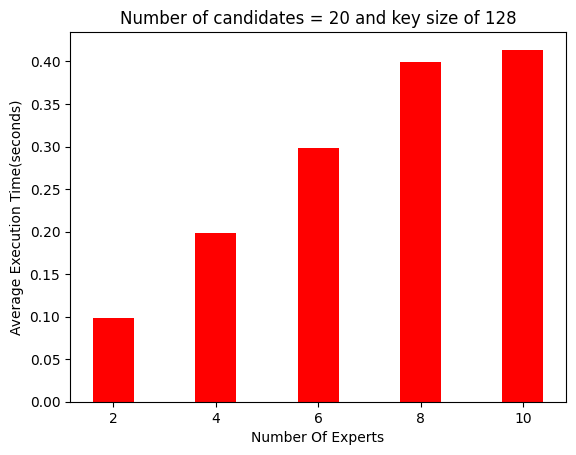

[0.09792606 0.1987243  0.29854983 0.39961794 0.4138381 ]


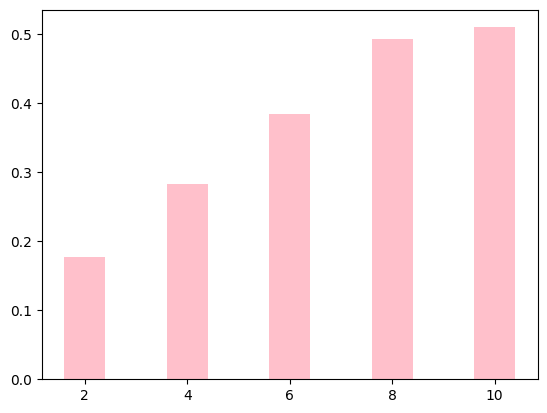

[0.17760028 0.28377268 0.3849241  0.49306402 0.5103455 ]


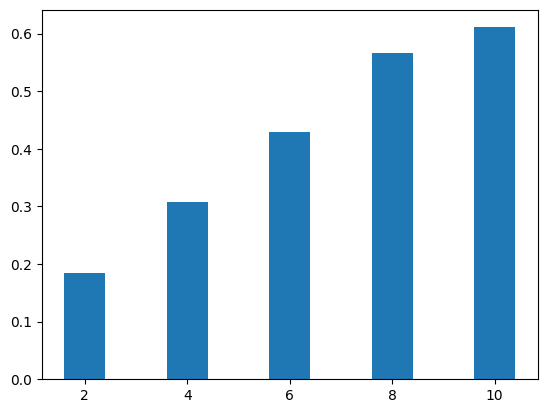

[0.18460035 0.30845988 0.4296438  0.5656034  0.61102545]


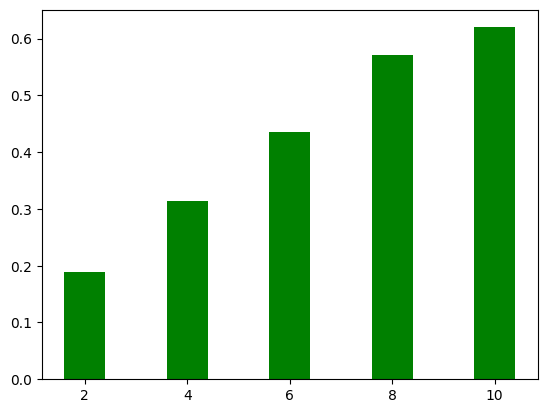

[0.18881491 0.31305754 0.43483773 0.5702682  0.6197648 ]


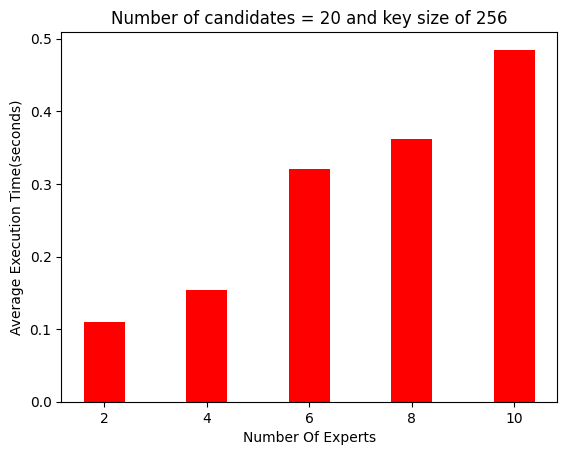

[0.11014573 0.1539489  0.32060224 0.36199644 0.48488665]


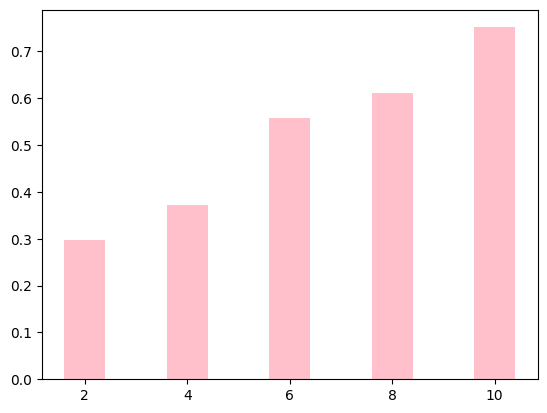

[0.2973909  0.37292302 0.55802286 0.6120795  0.7515384 ]


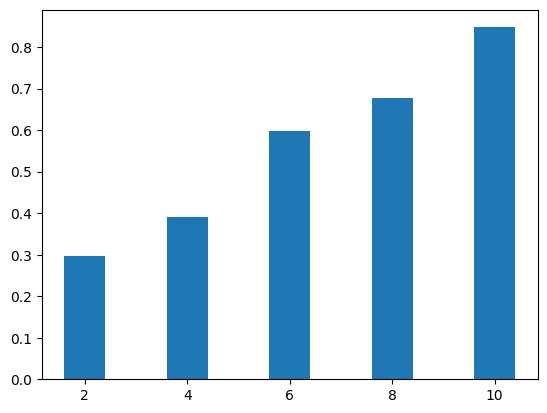

[0.29778296 0.39124492 0.5978805  0.6771819  0.84757817]


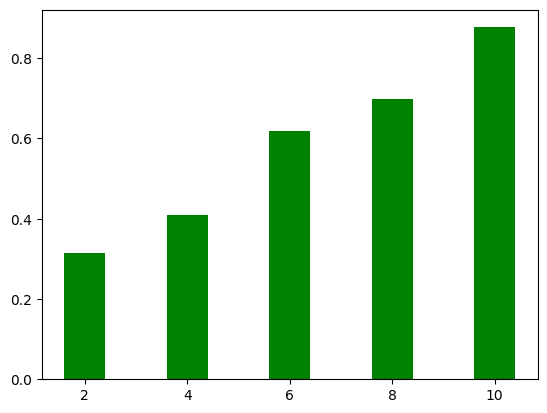

[0.31570563 0.4093345  0.61894023 0.698187   0.8768376 ]


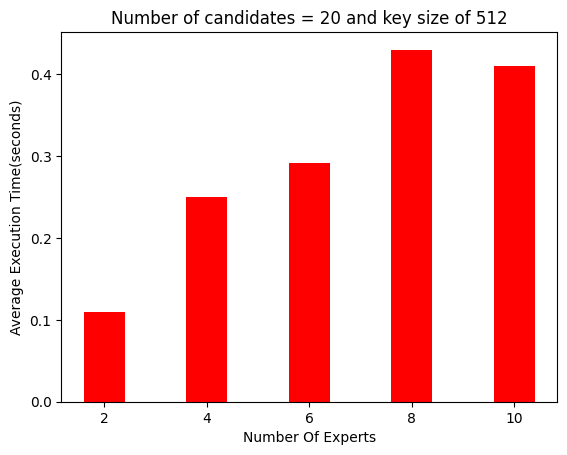

[0.10903537 0.24954577 0.29118755 0.42968863 0.40978774]


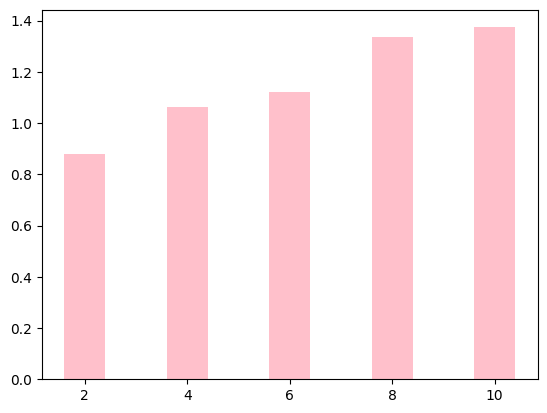

[0.8776306 1.0612634 1.122756  1.3377388 1.3742206]


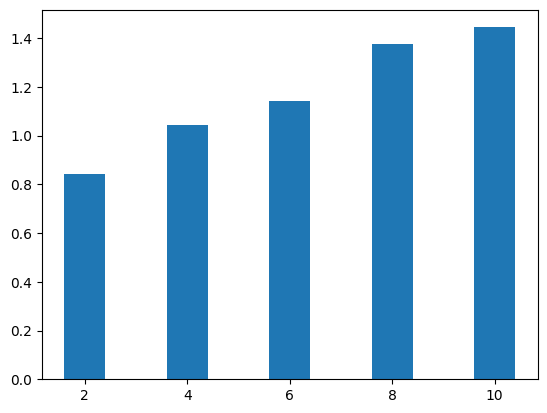

[0.84184235 1.0420324  1.1427091  1.3758687  1.4447727 ]


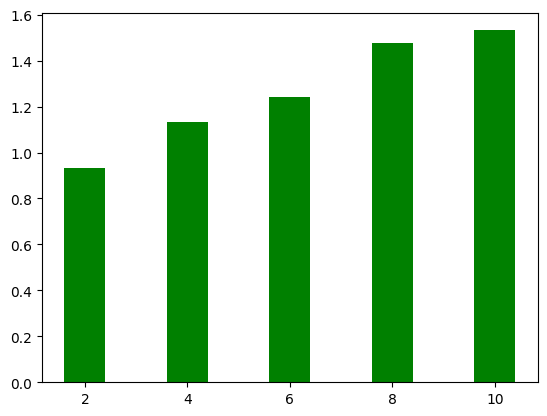

[0.93149215 1.133785   1.2412975  1.4765947  1.5320041 ]
Stored 'F1Time' (list)
Stored 'F2Time' (list)
Stored 'F3Time' (list)
Stored 'F4Time' (list)


In [118]:
keys = [128,256,512]
F1Time = []
F2Time = []
F3Time = []
F4Time = []
for i in range(0,3):
   time =  simulationHavingExpertsvariableCandidatesConst([2,4,6,8,10], 20, "experts", keys[i])
   F1Time.append(time[0])
   F2Time.append(time[1])
   F3Time.append(time[2])
   F4Time.append(time[3])
%store F1Time
%store F2Time
%store F3Time
%store F4Time


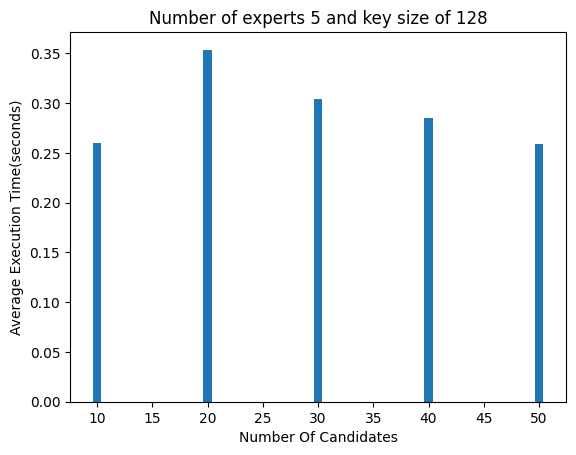

[0.26021367 0.35367605 0.30396372 0.28554    0.25918704]


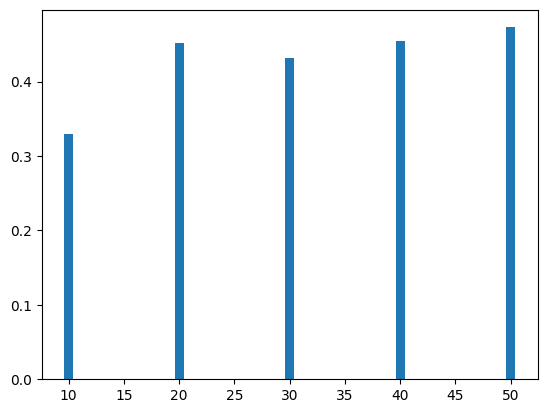

[0.32895398 0.45199376 0.43152103 0.45484763 0.47284278]


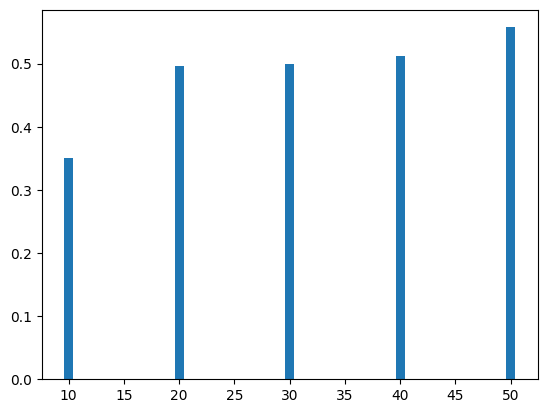

[0.34967923 0.49551645 0.49990535 0.5126506  0.55747736]


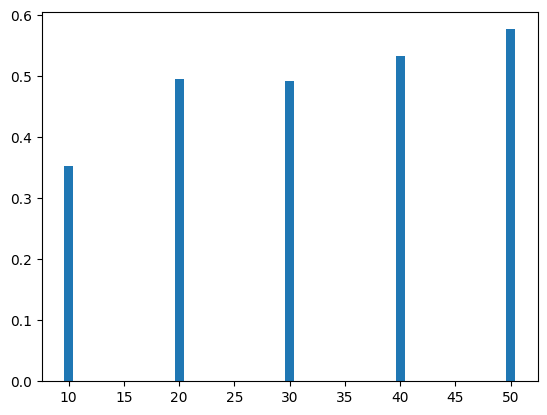

[0.35386902 0.4962105  0.49321318 0.5342451  0.5773245 ]


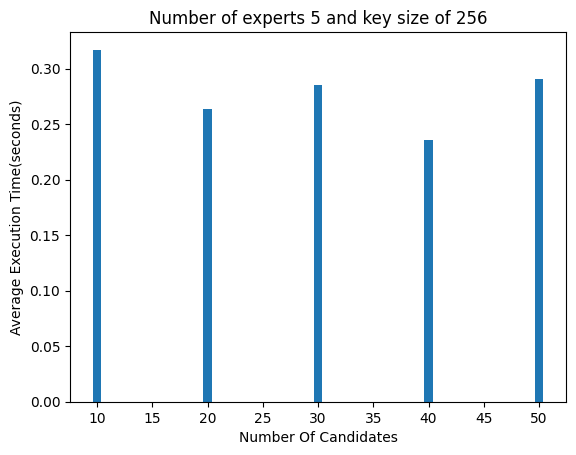

[0.317052   0.2639547  0.28562325 0.23581252 0.29095486]


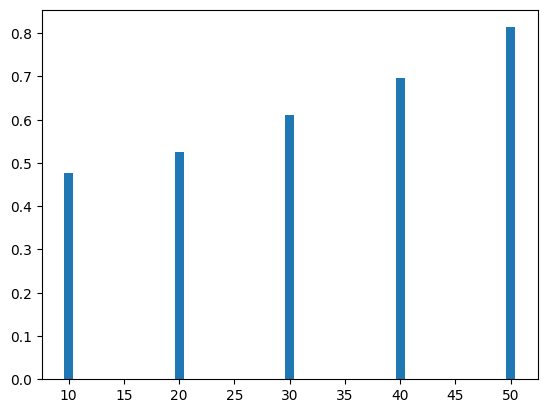

[0.47596294 0.52556    0.611508   0.6958904  0.8136799 ]


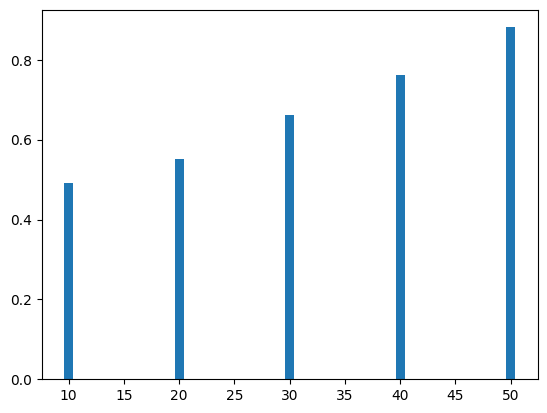

[0.4913002  0.55104136 0.66162956 0.7622026  0.8813998 ]


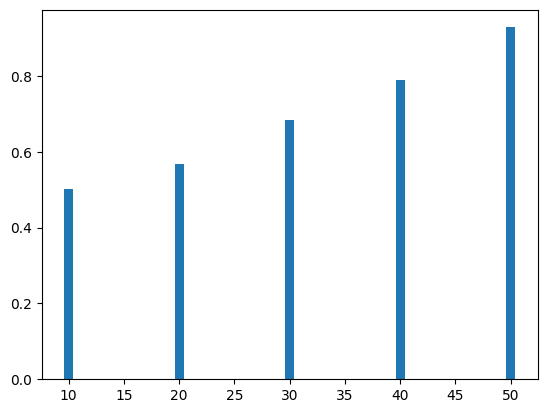

[0.50285107 0.5680932  0.68311375 0.7886673  0.92828465]


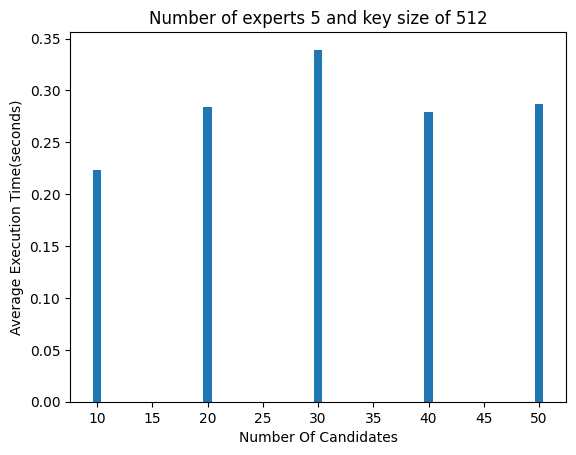

[0.2238131  0.28428742 0.3392551  0.27948534 0.28664345]


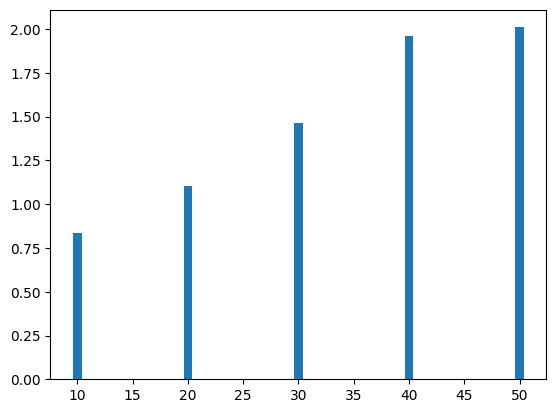

[0.8379448 1.1031597 1.4652472 1.9617567 2.010201 ]


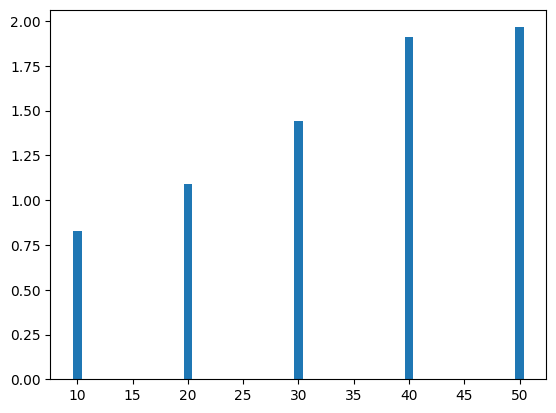

[0.82690465 1.0902196  1.4434408  1.9123284  1.9656242 ]


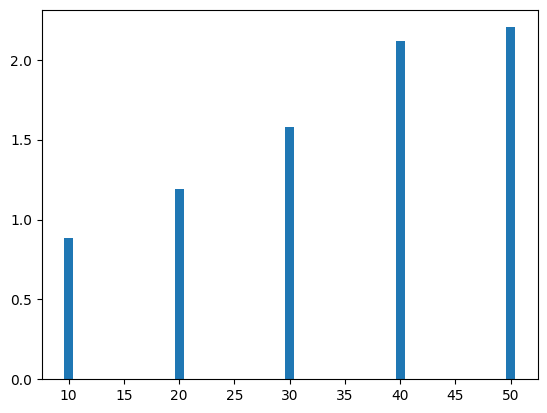

[0.8846177 1.193777  1.5797155 2.1200993 2.2036018]
Stored 'F1TimeCandidateVariable' (list)
Stored 'F2TimeCandidateVariable' (list)
Stored 'F3TimeCandidateVariable' (list)
Stored 'F4TimeCandidateVariable' (list)


In [119]:
keys = [128,256,512]
F1TimeCandidateVariable = []
F2TimeCandidateVariable = []
F3TimeCandidateVariable = []
F4TimeCandidateVariable = []
for i in range(0,3):
    time = simulationHavingExpertsConstCandidatesVariable(5,[10,20,30,40,50],"candidates",keys[i])
    F1TimeCandidateVariable.append(time[0])
    F2TimeCandidateVariable.append(time[1])
    F3TimeCandidateVariable.append(time[2])
    F4TimeCandidateVariable.append(time[3])
%store F1TimeCandidateVariable
%store F2TimeCandidateVariable
%store F3TimeCandidateVariable
%store F4TimeCandidateVariable

In [120]:
F1Time

[array([0.09792606, 0.1987243 , 0.29854983, 0.39961794, 0.4138381 ],
       dtype=float32),
 array([0.11014573, 0.1539489 , 0.32060224, 0.36199644, 0.48488665],
       dtype=float32),
 array([0.10903537, 0.24954577, 0.29118755, 0.42968863, 0.40978774],
       dtype=float32)]

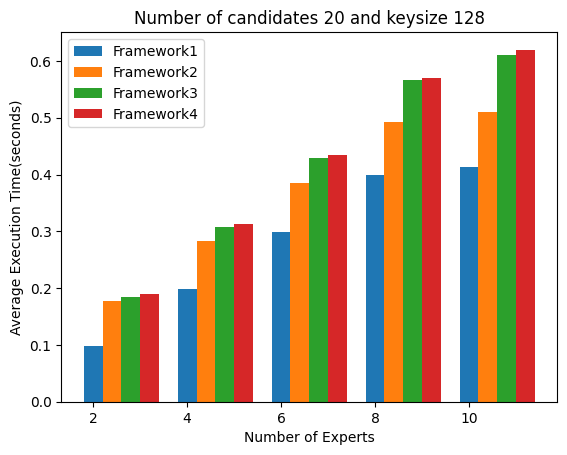

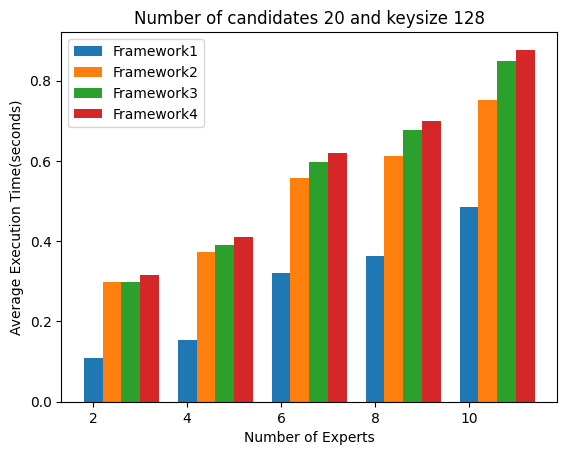

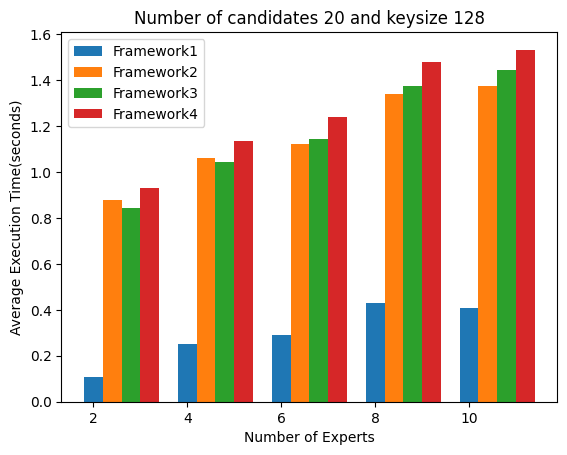

In [121]:
for i in range(0,3):
    X = [2,4,6,8,10] 
    width = 0.2
    X_axis = np.arange(len(X)) 
    plt.bar(X_axis , F1Time[i], width, label = 'Framework1') 
    plt.bar(X_axis + width  , F2Time[i], width, label = 'Framework2') 
    plt.bar(X_axis + width * 2 , F3Time[i], width, label = 'Framework3') 
    plt.bar(X_axis + width * 3 , F4Time[i], width, label = 'Framework4') 
    
    plt.xticks(X_axis, X) 
    plt.xlabel("Number of Experts") 
    plt.ylabel("Average Execution Time(seconds)") 
    plt.title("Number of candidates 20 and keysize 128"  ) 
    plt.legend() 
    plt.show()

In [122]:
F1TimeCandidateVariable

[array([0.26021367, 0.35367605, 0.30396372, 0.28554   , 0.25918704],
       dtype=float32),
 array([0.317052  , 0.2639547 , 0.28562325, 0.23581252, 0.29095486],
       dtype=float32),
 array([0.2238131 , 0.28428742, 0.3392551 , 0.27948534, 0.28664345],
       dtype=float32)]

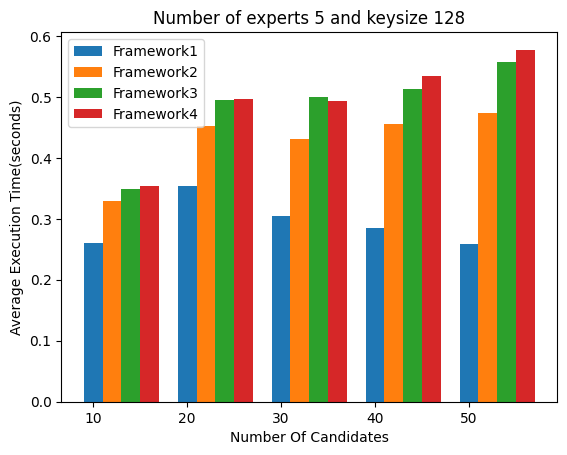

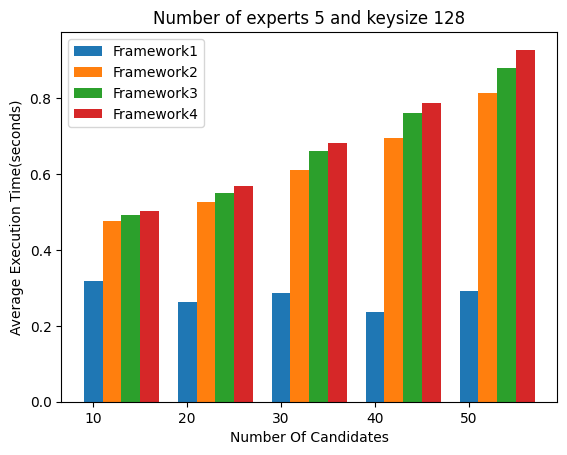

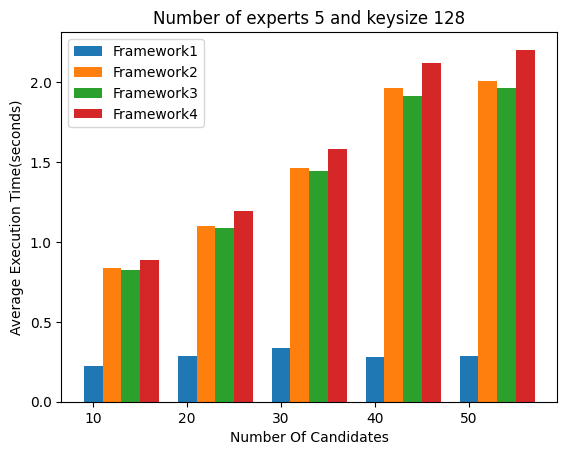

In [123]:
for i in range(0,3):
    X = [10,20,30,40,50] 
    width = 0.2
    X_axis = np.arange(len(X)) 
    plt.bar(X_axis , F1TimeCandidateVariable[i], width, label = 'Framework1') 
    plt.bar(X_axis + width  , F2TimeCandidateVariable[i], width, label = 'Framework2') 
    plt.bar(X_axis + width * 2 , F3TimeCandidateVariable[i], width, label = 'Framework3') 
    plt.bar(X_axis + width * 3 , F4TimeCandidateVariable[i], width, label = 'Framework4') 
    
    plt.xticks(X_axis, X) 
    plt.xlabel("Number Of Candidates") 
    plt.ylabel("Average Execution Time(seconds)") 
    plt.title("Number of experts 5 and keysize 128"  ) 
    plt.legend() 
    plt.show()


In [124]:
x = str(2)

In [125]:
x = rsa.encrypt(x.encode('utf8'),dictOfrsaPubKey[2])

In [126]:
x = int((rsa.decrypt((x), dictOfrsaPriKey[2])).decode('utf8'))

In [127]:
print(x, type(x))

2 <class 'int'>
